<a href="https://colab.research.google.com/github/chiyanglin-AStar/science_coding/blob/main/Qiskit_1_0_example1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ref from [A Beginners’ Guide to Qiskit 1.0](https://medium.com/@harini.hapuarachchi/a-beginners-guide-to-qiskit-1-0-c8e3e854d732)

In [1]:
!pip install qiskit
!pip install qiskit[visualization]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=b78d4632b78cd7d9d1277c80815ddb4998d53c03845f39c4d52402e73e883e84
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


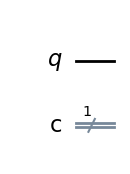

In [2]:
# Load qiskit functions into the local namespace
from qiskit import *

# Creat a circuit qc with 1 qubit and 1 classical bit
qc = QuantumCircuit(1,1)

# Draw the circuit ('mpl'asks to render using Matplotlib)
qc.draw(output = 'mpl')

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


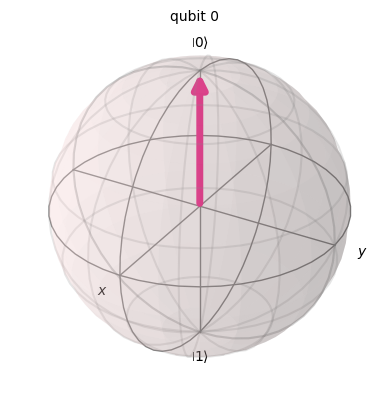

In [3]:
# subpackages need to be separately imported
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

init_state = Statevector(qc);
print(init_state)

plot_bloch_multivector(init_state)

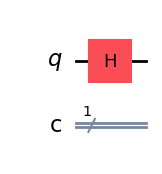

In [4]:
qc.h(0);                        # Apply a Hadamard to the q0 of qc
qc.draw(output = 'mpl')

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


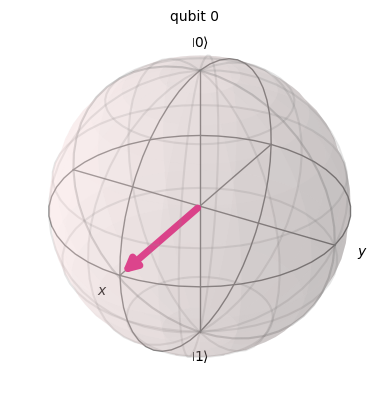

In [5]:
h_state = Statevector(qc);
print(h_state)

plot_bloch_multivector(h_state)

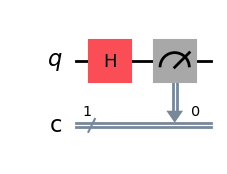

In [6]:
qc.measure(0, 0); # Measure qubit 0 to the classical bit 0
qc.draw(output='mpl')

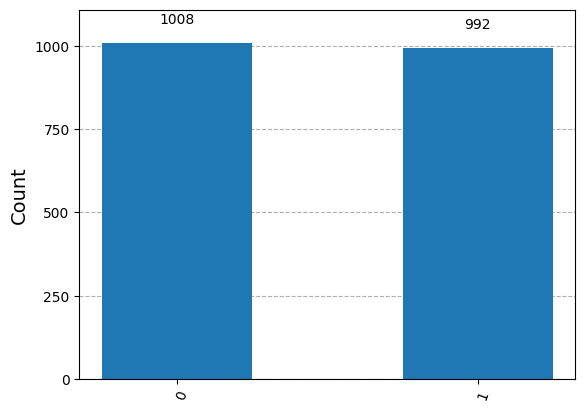

In [7]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

backend = BasicSimulator()

# If you do not specify the number of shots, the default is 1024
result = backend.run(qc, shots=2000).result()

# Extract the counts of 0 and 1 measurements
counts = result.get_counts()
plot_histogram(counts)

Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


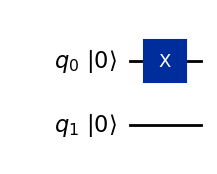

In [8]:
qc = QuantumCircuit(2)   # Make a circuit with 2 qubits (no classical bits)
qc.x(0)                  # Apply a gate to prepare the state of q0 into 1

print(Statevector(qc))

# initial_state=True shows the qubit values at the start
qc.draw(output='mpl', initial_state=True)

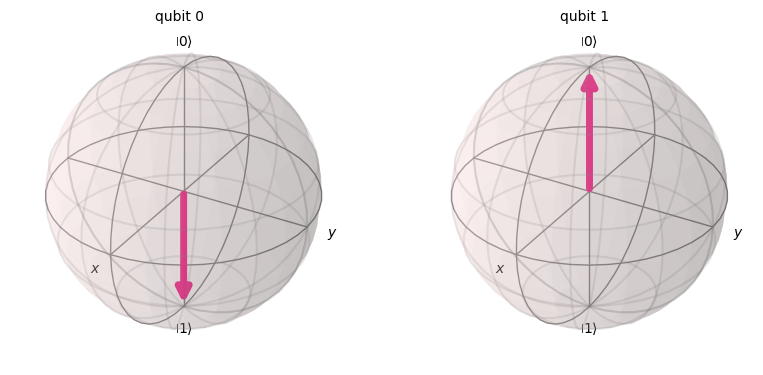

In [9]:
plot_bloch_multivector(qc)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))


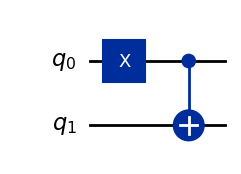

In [10]:
# Apply a CNOT gate with q0 as the control bit and q1 as the target bit
qc.cx(0,1)
print(Statevector(qc))
qc.draw(output='mpl')

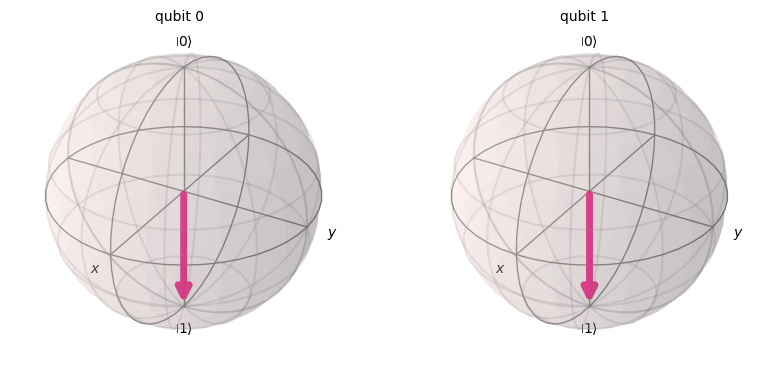

In [11]:
plot_bloch_multivector(qc)

# Simulating simple circuits in Qiskit

## The half-adder

The half-adder adds two bits as follows:

0+0 = 00
0+1 = 01
1+0 = 01
1+1 = 10

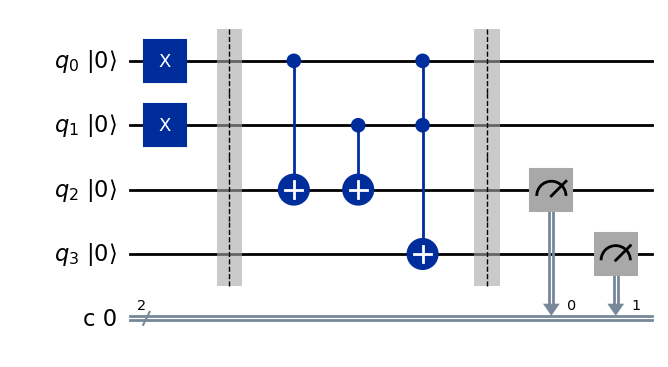

In [12]:
# Below, we add q1 + q0 and measure the result into classical bits c2c1
# The other qubits, q2 and q3 are only there to help

# Make a circuit with 4 qubits and 2 classical bits
qc_ha = QuantumCircuit(4,2)

# encode inputs to perform q_1 + q_0 = 1 + 1
qc_ha.x(0)
qc_ha.x(1)

qc_ha.barrier()

# Code the algorithm
qc_ha.cx(0,2)       # CNOT with q0 as control and q2 as target
qc_ha.cx(1,2)       # CNOT with q1 as control and q2 as target
qc_ha.ccx(0,1,3)    # CCNOT with q0, q1 as controls and q3 as target

qc_ha.barrier()

# extract outputs
qc_ha.measure(2,0)  # Measure qubit 2 into classical bit 0
qc_ha.measure(3,1)  # Measure qubit 3 into classical bit 1

# initial_state=True displays (doesn't set) the left-most values of qubits
qc_ha.draw(output = 'mpl', initial_state=True)

In [13]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 76.8 MB/s eta 0:00:00


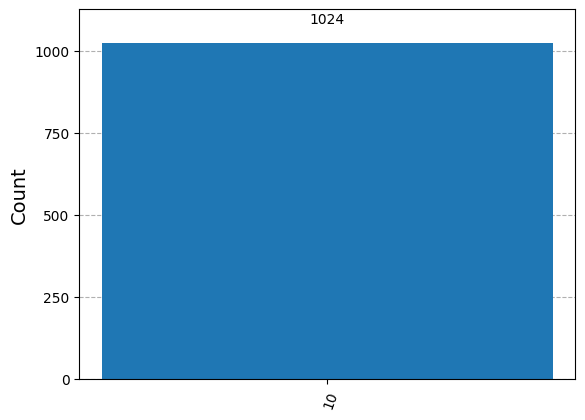

In [14]:
backend = BasicSimulator()
result = backend.run(qc_ha).result()
counts = result.get_counts()
plot_histogram(counts)

## Using fake backends

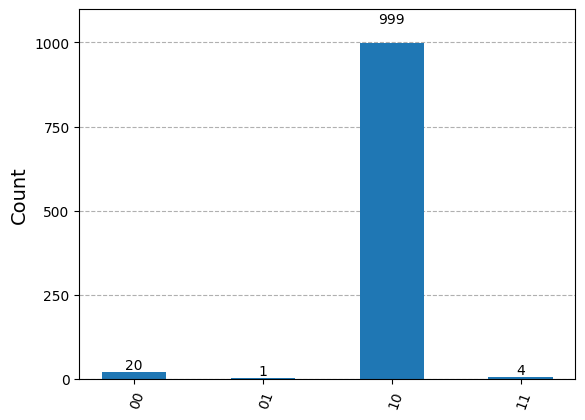

In [15]:
from qiskit.providers.fake_provider import GenericBackendV2

# Generate a 4-qubit simulated fake backend
# Several legacy fake backends are replaced with GenericBackendV2 in 1.0
backend = GenericBackendV2(num_qubits=4)

# Transpile and run
transpiled_circuit = transpile(qc_ha, backend)
result = backend.run(transpiled_circuit).result()

counts = result.get_counts()
plot_histogram(counts)

# Grover’s Algorithm — 2 qubit example

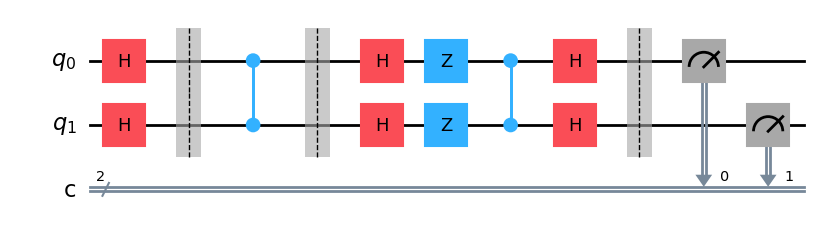

In [16]:
from qiskit import *

# Initialising a circuit with 2 qubits and 2 classical bits
gc = QuantumCircuit(2,2)

# Putting the two qubits into the complete superposition state |s>
# This is done by applying Hadamard gates on both qubits [0,1]
gc.h([0,1])

gc.barrier()

# The 'oracle' function for |w> = |11> is a controlled z gate
# This implements the U_w rotation discussed in the video
gc.cz(0,1)

gc.barrier()

# The following code implements the rotation U_s
# This rotates U_w|s> onto the winning state |w>
gc.h([0,1])
gc.z([0,1])
gc.cz(0,1)
gc.h([0,1])

gc.barrier()

# Measure qbits [0,1] into classical bits [0, 1]
gc.measure([0,1], [0,1])

# Draw the circuit
gc.draw(output = 'mpl')

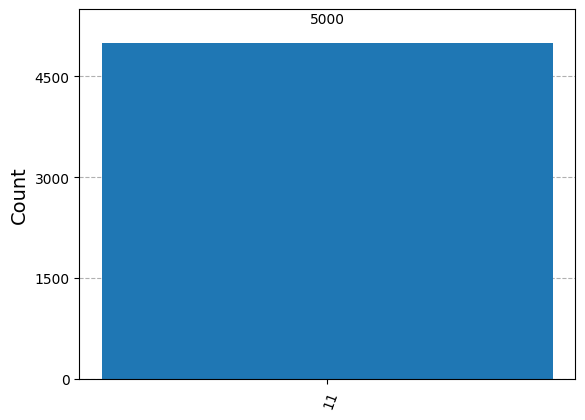

In [17]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

# Prepare and run the circuit 5000 times and show the statistical output
backend = BasicSimulator()
result = backend.run(gc, shots=5000).result()
counts = result.get_counts()
plot_histogram(counts)